<a href="https://colab.research.google.com/github/ErikLarssonDev/Time-Series/blob/main/LSTM_Time_Series_Forecasting_of_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Time Series Forecasting of Temperature

## Preparing the data

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 0s 0us/step


In [4]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
df = df[5::6] # Take every 6th only, every hour instead of 10 min intervals
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [7]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


<Axes: xlabel='Date Time'>

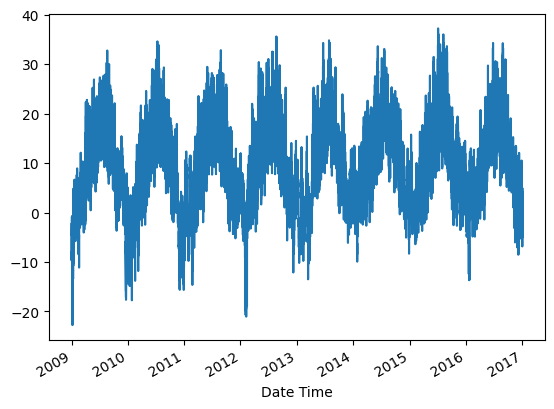

In [9]:
temp = df['T (degC)']
temp.plot()

In [10]:
def df_to_X_y(df, window_size=5):
  """
  Converts a dataframe to X and y numpy arrays where you observe a window size
  and then have the next value as y.

  Example:
                 X               Y
  # [[[1], [2], [3], [4], [5]]] [6]
  # [[[2], [3], [4], [5], [6]]] [7]
  # [[[3], [4], [5], [6], [7]]] [8]
  """
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
WINDOW_SIZE=5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [13]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

## Creating and training a baseline model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [16]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 [==============================] - 19s 6ms/step - loss: 27.9810 - root_mean_squared_error: 5.2897 - val_loss: 1.0710 - val_root_mean_squared_error: 1.0349
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7010 - root_mean_squared_error: 1.3042 - val_loss: 0.5973 - val_root_mean_squared_error: 0.7729
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.8630 - root_mean_squared_error: 0.9290 - val_loss: 0.5361 - val_root_mean_squared_error: 0.7322
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7172 - root_mean_squared_error: 0.8469 - val_loss: 0.5079 - val_root_mean_squared_error: 0.7126
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6775 - root_mean_squared_error: 0.8231 - val_loss: 0.5067 - val_root_mean_squared_error: 0.7118
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6633 - root_mean_squared_error: 0.8144 - val_l

## Loading the model and making predictions

In [17]:
from tensorflow.keras.models import load_model
model = load_model('model/')

In [55]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

### Making predictions on the training set

1875/1875 [==============================] - 4s 2ms/step


(       Predictions  Actuals
 0        -9.816556    -9.67
 1        -9.615195    -9.17
 2        -8.789055    -8.10
 3        -7.256079    -7.66
 4        -7.170328    -7.04
 ...            ...      ...
 59995     5.976571     6.07
 59996     7.213630     9.88
 59997    12.110774    13.53
 59998    15.850551    15.43
 59999    16.243643    15.54
 
 [60000 rows x 2 columns],
 0.6467452401517075)

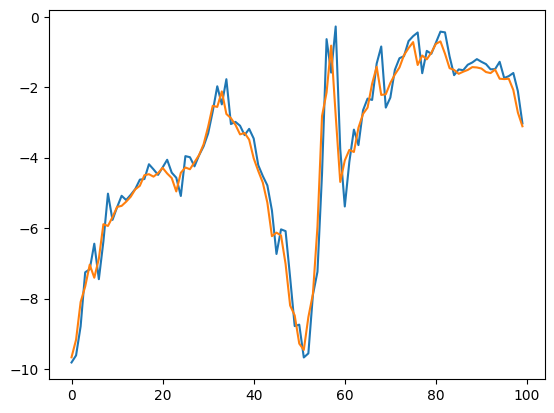

In [31]:
plot_predictions(model, X_train, y_train)

### Making predictions on the validation set

157/157 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       15.298235    14.02
 1       13.197478    13.67
 2       13.055926    12.27
 3       11.480764    11.19
 4       10.390044    10.85
 ...           ...      ...
 4995    17.422876    18.27
 4996    17.359745    17.85
 4997    17.114061    16.65
 4998    15.897094    15.85
 4999    15.070779    15.09
 
 [5000 rows x 2 columns],
 0.48567429871357165)

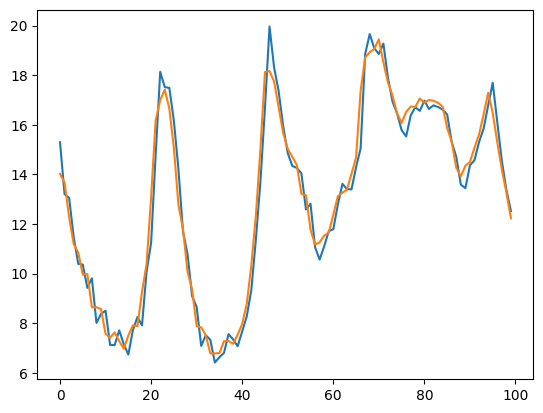

In [32]:
plot_predictions(model, X_val, y_val)

### Making predictions on the test set

159/159 [==============================] - 0s 3ms/step


(      Predictions  Actuals
 0       14.396859    13.99
 1       13.287561    13.46
 2       12.888417    12.93
 3       12.472287    12.43
 4       12.027122    12.17
 ...           ...      ...
 5081    -1.239725    -0.98
 5082    -1.460385    -1.40
 5083    -1.640144    -2.75
 5084    -3.252397    -2.89
 5085    -3.110189    -3.93
 
 [5086 rows x 2 columns],
 0.6303741635968759)

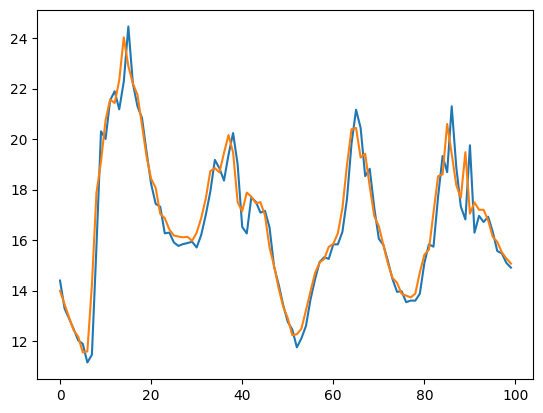

In [33]:
plot_predictions(model, X_test, y_test)

## Model 2: 1D CNN

In [34]:
# 1d CNN
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [36]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 7.5089 - root_mean_squared_error: 2.7402 - val_loss: 0.9948 - val_root_mean_squared_error: 0.9974
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9966 - root_mean_squared_error: 0.9983 - val_loss: 0.6386 - val_root_mean_squared_error: 0.7991
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7559 - root_mean_squared_error: 0.8694 - val_loss: 0.5418 - val_root_mean_squared_error: 0.7361
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6961 - root_mean_squared_error: 0.8343 - val_loss: 0.5194 - val_root_mean_squared_error: 0.7207
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6787 - root_mean_squared_error: 0.8239 - val_loss: 0.4996 - val_root_mean_squared_error: 0.7068
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6686 - root_mean_squared_error: 0.8177 - val_loss: 

159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.320770    13.99
 1       13.223012    13.46
 2       12.896441    12.93
 3       12.440392    12.43
 4       12.008271    12.17
 ...           ...      ...
 5081    -1.260059    -0.98
 5082    -1.454574    -1.40
 5083    -1.667148    -2.75
 5084    -3.012902    -2.89
 5085    -3.260167    -3.93
 
 [5086 rows x 2 columns],
 0.6206021314268491)

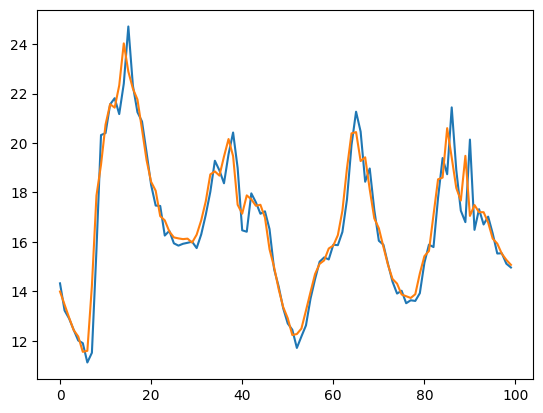

In [37]:
plot_predictions(model2, X_test, y_test)

We probably prefer the CNN model over the LSTM model as it is smaller and has a lower test MSE.

## Model 3: Gated Recurrent Unit (GRU)

In [38]:
# GRU
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [40]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 37.1179 - root_mean_squared_error: 6.0924 - val_loss: 1.0317 - val_root_mean_squared_error: 1.0157
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.8434 - root_mean_squared_error: 1.3577 - val_loss: 0.6128 - val_root_mean_squared_error: 0.7828
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.8653 - root_mean_squared_error: 0.9302 - val_loss: 0.5248 - val_root_mean_squared_error: 0.7244
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7051 - root_mean_squared_error: 0.8397 - val_loss: 0.5023 - val_root_mean_squared_error: 0.7087
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6648 - root_mean_squared_error: 0.8153 - val_loss: 0.5001 - val_root_mean_squared_error: 0.7072
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6539 - root_mean_squared_error: 0.8086 - val_

159/159 [==============================] - 1s 2ms/step


(      Predictions  Actuals
 0       14.418683    13.99
 1       13.254105    13.46
 2       12.877055    12.93
 3       12.445002    12.43
 4       11.994130    12.17
 ...           ...      ...
 5081    -1.228414    -0.98
 5082    -1.458687    -1.40
 5083    -1.611170    -2.75
 5084    -3.091632    -2.89
 5085    -3.000831    -3.93
 
 [5086 rows x 2 columns],
 0.6348920297155334)

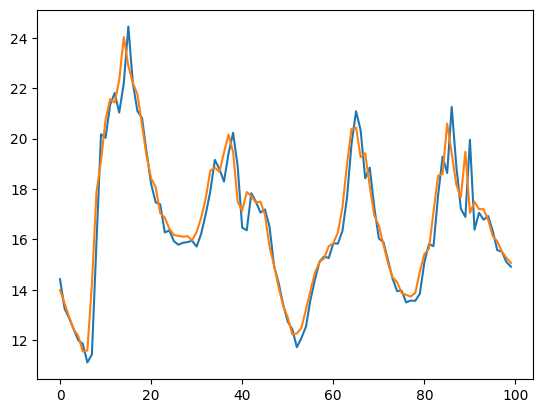

In [42]:
plot_predictions(model3, X_test, y_test)

The CNN model is still the best one on the test set with the lowest MSE and the smallest size.

## Using more variables (day/year sin/cos)

In [43]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [44]:
day = 60*60*24 # Number of seconds in a day
year = (365.2425)*day # Number of seconds in a year

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [45]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [46]:
def df_to_X_y2(df, window_size=6): # Increasing the window size compared to the function above
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [47]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [48]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [49]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [50]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

## Model 4: LSTM with day/year sin/cos

In [51]:
model4 = Sequential()
model4.add(InputLayer((6, 5))) # Adding one more time step and 4 more variables
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [53]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 39.6008 - root_mean_squared_error: 6.2929 - val_loss: 3.8983 - val_root_mean_squared_error: 1.9744
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 4.7197 - root_mean_squared_error: 2.1725 - val_loss: 2.0800 - val_root_mean_squared_error: 1.4422
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.1718 - root_mean_squared_error: 1.4737 - val_loss: 1.0692 - val_root_mean_squared_error: 1.0340
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1770 - root_mean_squared_error: 1.0849 - val_loss: 0.7773 - val_root_mean_squared_error: 0.8816
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8755 - root_mean_squared_error: 0.9357 - val_loss: 0.6163 - val_root_mean_squared_error: 0.7850
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7096 - root_mean_squared_error: 0.8424 - val_

159/159 [==============================] - 1s 2ms/step


(      Predictions  Actuals
 0       13.140190    13.46
 1       12.717020    12.93
 2       12.300428    12.43
 3       11.997607    12.17
 4       12.111172    11.55
 ...           ...      ...
 5080    -1.119598    -0.98
 5081    -1.468333    -1.40
 5082    -1.738390    -2.75
 5083    -3.138285    -2.89
 5084    -3.144817    -3.93
 
 [5085 rows x 2 columns],
 0.48279482668783036)

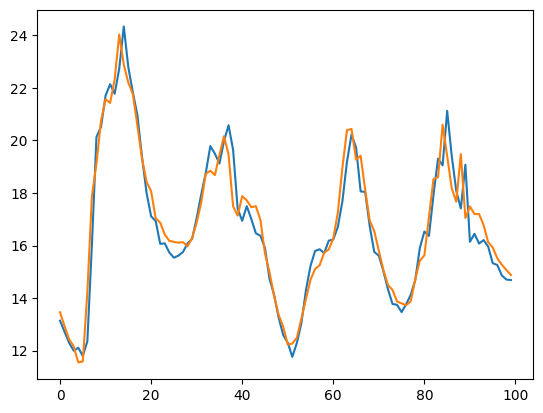

In [56]:
plot_predictions(model4, X2_test, y2_test)

Adding the day/year sin/cos variables seems to provide a quite good performance increase by lowering the test set MSE.

## Adding p (mbar) as a variable, both as data and as an additional target to predict

In [57]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


In [58]:
def df_to_X_y3(df, window_size=7): # Increasing window size by 1
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [59]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [60]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [61]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
  return X

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [62]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-1.07355644e+00,  1.04009390e+00, -9.65925826e-01,
          2.58819045e-01,  5.22877889e-01, -8.52407598e-01],
        [-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        ...,
        [-8.80748054e-01,  6.66328883e-01, -2.58819045e-01,
          9.65925826e-01,  5.20431780e-01, -8.53903251e-01],
        [-8.29817537e-01,  5.37039098e-01, -7.16474371e-12,
          1.00000000e+00,  5.19819584e-01, -8.54276068e-01],
        [-8.01927015e-01,  4.74744929e-01,  2.58819045e-01,
          9.65925826e-01,  5.19207120e-01, -8.54648446e-01]],

       [[-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        [-9.14701

In [63]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

## Model 5: LSTM extended to use p (mbar) to predict temperature and p (mbar)

In [64]:
model5 = Sequential()
model5.add(InputLayer((7, 6))) # 1 more input and the time window is increased by 1
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear')) # Two outputs as we predict both temp and p

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [66]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1436 - root_mean_squared_error: 0.3789 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1785
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0077 - root_mean_squared_error: 0.0875 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0743
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0062 - root_mean_squared_error: 0.0789 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0055 - root_mean_squared_error: 0.0745 - val_l

In [67]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df

159/159 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.413623,0.412451,-0.783256,-0.793439
1,0.370521,0.353683,-0.769543,-0.763123
2,0.332580,0.323123,-0.735520,-0.721893
3,0.337727,0.250251,-0.685811,-0.652773
4,0.288688,0.254952,-0.601203,-0.652773
...,...,...,...,...
5079,-1.270231,-1.222477,1.599388,1.601508
5080,-1.283506,-1.271843,1.582804,1.506923
5081,-1.293181,-1.430516,1.490766,1.481458
5082,-1.472723,-1.446971,1.442107,1.415976


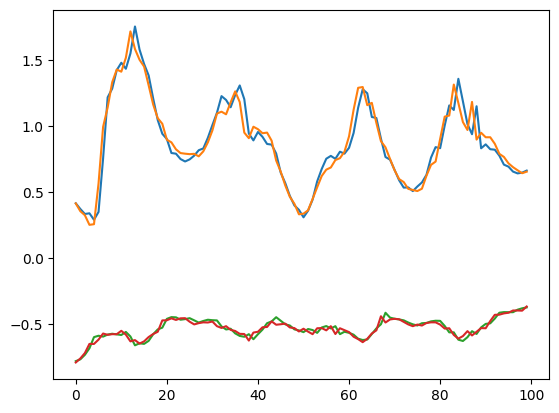

In [68]:
plot_predictions2(model5, X3_test, y3_test)

In [69]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [70]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  return df

In [71]:
post_processed_df = get_predictions_postprocessed(model5, X3_test, y3_test)
post_processed_df

159/159 [==============================] - 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.939972,12.93,982.513977,982.43
1,12.573258,12.43,982.627075,982.68
2,12.250460,12.17,982.907654,983.02
3,12.294250,11.55,983.317566,983.59
4,11.877028,11.59,984.015320,983.59
...,...,...,...,...
5079,-1.386287,-0.98,1002.162537,1002.18
5080,-1.499233,-1.40,1002.025757,1001.40
5081,-1.581552,-2.75,1001.266785,1001.19
5082,-3.109091,-2.89,1000.865540,1000.65


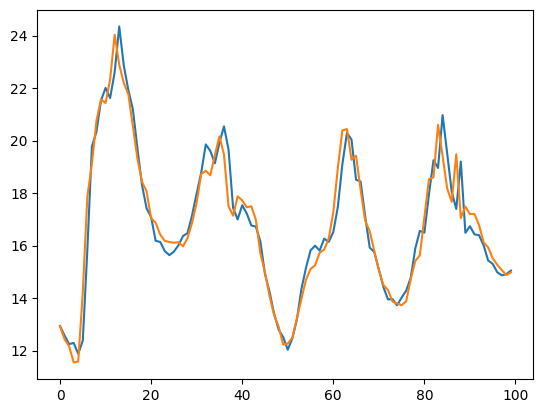

In [72]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

In [80]:
# MSE Temperature
mse(post_processed_df['Temperature Predictions'], post_processed_df['Temperature Actuals'])

0.47150319273322605

So model 5 is the current best model compared to the previous best model 4 with MSE 0.48279482668783036

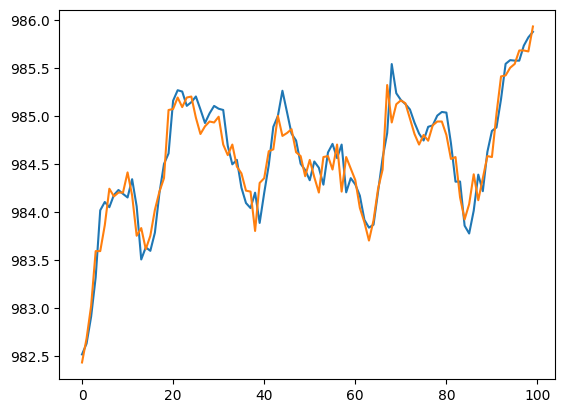

In [73]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [81]:
# MSE Pressure
mse(post_processed_df['Pressure Predictions'], post_processed_df['Pressure Actuals'])

0.08772302050821382

## Model 6: Multiple LSTM blocks

In [74]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(16))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 16)                3136      
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 8282 (32.35 KB)
Trainable params: 8282 (32.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [76]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 [==============================] - 21s 9ms/step - loss: 0.3430 - root_mean_squared_error: 0.5856 - val_loss: 0.0773 - val_root_mean_squared_error: 0.2780
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0554 - root_mean_squared_error: 0.2354 - val_loss: 0.0378 - val_root_mean_squared_error: 0.1945
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0300 - root_mean_squared_error: 0.1731 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1468
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1162
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0105 - root_mean_squared_error: 0.1027 - val

In [82]:
post_processed_df = get_predictions_postprocessed(model6, X3_test, y3_test)
post_processed_df

159/159 [==============================] - 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.803729,12.93,982.664673,982.43
1,12.499604,12.43,982.758911,982.68
2,12.230174,12.17,982.966980,983.02
3,12.229797,11.55,983.311768,983.59
4,11.825236,11.59,983.971802,983.59
...,...,...,...,...
5079,-1.276131,-0.98,1002.122375,1002.18
5080,-1.848392,-1.40,1001.770264,1001.40
5081,-1.951209,-2.75,1001.080811,1001.19
5082,-2.835655,-2.89,1000.649414,1000.65


In [83]:
# MSE Temperature
mse(post_processed_df['Temperature Predictions'], post_processed_df['Temperature Actuals'])

0.5472266036794103

In [84]:
# MSE Pressure
mse(post_processed_df['Pressure Predictions'], post_processed_df['Pressure Actuals'])

0.15274029699478192

Model 6 is not better than model 5.

## Model 7: CNN with the updated data

In [77]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 3080      
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [79]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1173 - root_mean_squared_error: 0.3425 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1556
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0164 - root_mean_squared_error: 0.1280 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1042
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0098 - root_mean_squared_error: 0.0989 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0078 - root_mean_squared_error: 0.0882 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0803
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0068 - root_mean_squared_error: 0.0827 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0063 - root_mean_squared_error: 0.0795 - val_loss: 0

In [85]:
post_processed_df = get_predictions_postprocessed(model7, X3_test, y3_test)
post_processed_df

159/159 [==============================] - 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,13.013609,12.93,982.266724,982.43
1,12.604647,12.43,982.516479,982.68
2,12.144541,12.17,982.849854,983.02
3,12.141153,11.55,983.302979,983.59
4,11.713078,11.59,983.747009,983.59
...,...,...,...,...
5079,-1.402145,-0.98,1002.074524,1002.18
5080,-1.667769,-1.40,1001.715942,1001.40
5081,-1.929741,-2.75,1000.996155,1001.19
5082,-3.291414,-2.89,1000.416870,1000.65


In [86]:
# MSE Temperature
mse(post_processed_df['Temperature Predictions'], post_processed_df['Temperature Actuals'])

0.5083016221537751

In [87]:
# MSE Pressure
mse(post_processed_df['Pressure Predictions'], post_processed_df['Pressure Actuals'])

0.11400654125446617

Model 5 is still the best model.